Instalowanie modułów

In [ ]:
pip install statsmodels

In [ ]:
pip install scikit-learn

In [108]:
# 0.1 Importowanie niezbędnych bibliotek
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

In [146]:
# Wczytanie danych
df = pd.read_csv('insurance.csv')

In [148]:
# Opis merytoryki zbioru danych
print("Opis merytoryki zbioru danych:")
print(df.info())

Opis merytoryki zbioru danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None


In [149]:
# Statystyki opisowe zmiennych
print("\nStatystyki opisowe zmiennych:")
print(df.describe())


Statystyki opisowe zmiennych:
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [ ]:
# Wykresy rozkładu i korelacji zmiennych
sns.pairplot(df)
plt.show()

In [ ]:
sns.histplot(df['charges'])

In [181]:
# Podział danych na zbiór treningowy i testowy
X = df[['age', 'sex', 'bmi', 'children', 'smoker']]
y = df['charges']
# Konwersja zmiennych kategorycznych za pomocą pd.get_dummies
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [152]:
# Modelowanie za pomocą sklearn
model_sklearn = LinearRegression()
model_sklearn.fit(X_train, y_train)

LinearRegression()

In [153]:
# Predykcje i ocena dopasowania na zbiorze testowym
y_pred_sklearn = model_sklearn.predict(X_test)
mae_sklearn = mean_absolute_error(y_test, y_pred_sklearn)
rmse_sklearn = np.sqrt(mean_squared_error(y_test, y_pred_sklearn))

In [154]:
print("\nOcena modelu za pomocą sklearn:")
print(f"MAE: {mae_sklearn}")
print(f"RMSE: {rmse_sklearn}")


Ocena modelu za pomocą sklearn:
MAE: 4213.484797807139
RMSE: 5829.17293025419


In [155]:
# print the intercept
print(model_sklearn.intercept_)

-12113.451250917098


In [201]:
coeff_df = pd.DataFrame(model_sklearn.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
age,257.068962
bmi,327.533514
children,427.254431
sex_male,-7.951788
smoker_yes,23653.903315


In [206]:
# Modelowanie za pomocą statmodels
model_stats = sm.OLS(y_train, X_train)
results = model_stats.fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [205]:
# Wyświetlenie podsumowania modelu
print("\nPodsumowanie modelu za pomocą statmodels:")
print(results.summary())


Podsumowanie modelu za pomocą statmodels:


NameError: name 'results' is not defined

In [ ]:
# Interpretacja oszacowań modelu oraz własności statystycznych modelu

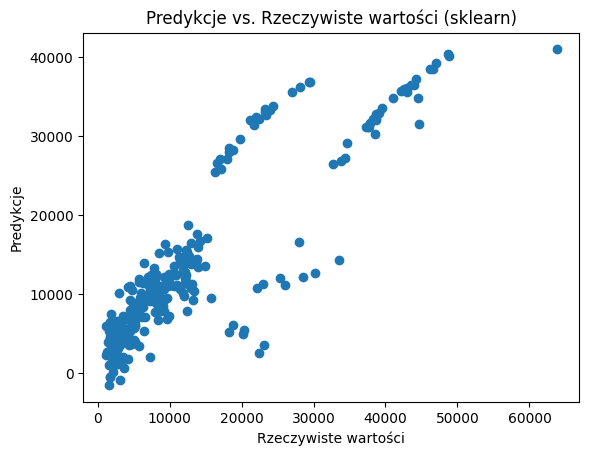

In [204]:
# Wykres predykcji vs. rzeczywiste wartości na zbiorze testowym
plt.scatter(y_test, y_pred_sklearn)
plt.xlabel("Rzeczywiste wartości")
plt.ylabel("Predykcje")
plt.title("Predykcje vs. Rzeczywiste wartości (sklearn)")
plt.show()